In [2]:
import pandas as pd
import numpy as np
import math
import openpyxl
from scipy.interpolate import interp1d
import statsmodels.formula.api as sm


In [4]:

data_orig = pd.read_excel(r"Case_Study_Data.xlsx", "Rating Tables" )


#split out asset size data into df
asset_size_df = data_orig.iloc[6:18,2:4]
asset_size_df.columns = ["asset_size","base_rate"]
asset_size_df = asset_size_df.astype(float)
asset_size_df["log_asset_size"] = np.log(asset_size_df["asset_size"])
asset_size_df["log_base_rate"] = np.log(asset_size_df["base_rate"])


limit_df = data_orig.iloc[20:74,2:4]
limit_df.columns = ["limit","factor"]
limit_df = limit_df.astype(float)
 
industry_df = data_orig.iloc[77:80,2:4]
industry_df.columns = ["hazard_group","factor"]

In [2]:
    # lists if needed

asset_size = [ 1, 1000000, 2500000, 5000000, 10000000, 15000000, 20000000, 25000000, 50000000, 75000000, 100000000, 250000000]
base_rate = [ 1065, 1819, 3966, 3619, 4291, 4905, 5120, 5499, 6279, 6966, 7156, 8380]

limit = [ 0, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 25000, 35000, 50000, 75000, 100000, 125000,
150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000,
475000, 500000, 525000, 550000, 575000, 600000, 625000, 650000, 675000, 700000, 725000, 750000, 775000,
800000, 825000, 850000, 875000, 900000, 925000, 950000, 975000, 1000000, 2000000, 2500000, 3000000, 4000000, 5000000 ]

factor = [ -0.76, -0.6, -0.51, -0.406, -0.303, -0.231, -0.128, -0.064, 0, 0.105, 0.175, 0.277, 0.35, 0.406,
0.452, 0.491, 0.525, 0.555, 0.581, 0.605, 0.627, 0.648, 0.666, 0.684, 0.7, 0.715, 0.73, 0.743, 0.756, 0.807,
0.819, 0.831, 0.842, 0.853, 0.864, 0.874, 0.883, 0.893, 0.902, 0.91, 0.919, 0.927, 0.935, 0.943, 0.95, 0.957,
0.964, 0.971, 1, 1.415,  1.526, 1.637, 1.82, 1.986]

#asset_size_df = pd.DataFrame(asset_size, columns=['asset_size'])
#asset_size_df['base_rate'] = base_rate
#limit_df = pd.DataFrame(limit, columns=['limit'])
#limit_df['factor'] = factor
    
#industry_dict = {"Hazard Group 1": 1, "Hazard Group 2": 1.25, "Hazard Group 3": 1.5}

Intercept         6.748853
log_asset_size    0.105872
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          log_base_rate   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     43.66
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           6.02e-05
Time:                        00:57:14   Log-Likelihood:               -0.22238
No. Observations:                  12   AIC:                             4.445
Df Residuals:                      10   BIC:                             5.415
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

C:\Users\watso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: xlabel='log_asset_size', ylabel='pred_base'>

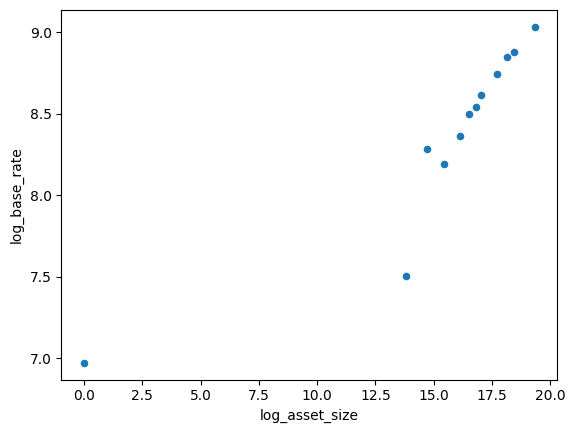

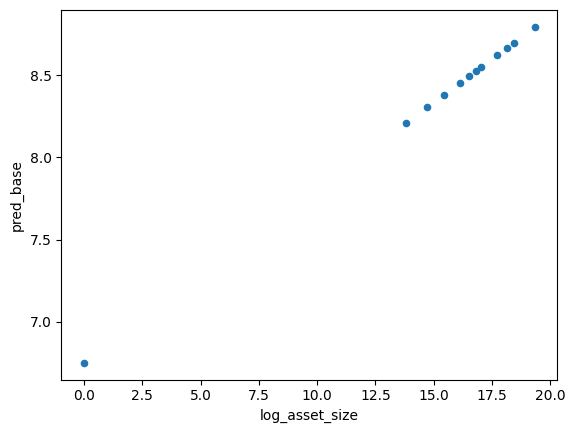

In [5]:
# assess the structure of the curve

asset_size_model = sm.ols(formula="log_base_rate ~ log_asset_size", data=asset_size_df).fit() #log transform gets better fit
print(asset_size_model.params)
print(asset_size_model.summary())
pred_as=asset_size_model.predict(asset_size_df["log_asset_size"])

asset_size_df["pred_base"] = pred_as

asset_size_df.plot.scatter(x= "log_asset_size", y= "log_base_rate")
asset_size_df.plot.scatter(x= "log_asset_size", y= "pred_base")